## Install the Pre-requisites

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_AGN/

/content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_AGN


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Aug 24 14:47:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
!pip install --user -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 705 kB 7.5 MB/s 
     |████████████████████████████████| 61 kB 535 kB/s 
     |████████████████████████████████| 419 kB 96.4 MB/s 
     |████████████████████████████████| 1.8 MB 81.2 MB/s 
     |████████████████████████████████| 125 kB 97.6 MB/s 
     |████████████████████████████████| 496 kB 100.1 MB/s 
     |████████████████████████████████| 5.9 MB 82.8 MB/s 
     |████████████████████████████████| 11.0 MB 54.3 MB/s 
     |████████████████████████████████| 181 kB 102.4 MB/s 
     |████████████████████████████████| 157 kB 85.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 102.6 MB/s 
     |████████████████████████████████| 157 kB 101.3 MB/s 
     |████████████████████████████████| 157 kB 97.6 MB/s 
     |████████████████████████████████| 157 kB 99.2 MB/s 
     |█████████████████████████

# Dataset


## Download the NISP Dataset

Edit config.py with data path or add as arguments

# Download Noise Dataset

In [ ]:
mkdir noise_dataset

In [ ]:
import wavencoder
wavencoder.utils.download_noise_dataset('noise_dataset', sample_rate='16k', download_all=True)

# Prepare NISP Dataset

In [ ]:
!python prepare_nisp_data.py 

# EDA on the NISP Datasets

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("../NISP-Dataset/total_spkrinfo.list", sep=' ')
df.head(10)

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar
5,Hin_0006,Male,Hindi,166.0,43.0,86,61.6,25.98,Delhi,West
6,Hin_0007,Female,Hindi,178.0,44.0,88,67.8,25.31,Maharashtra,Gondiya
7,Hin_0008,Male,Hindi,179.0,44.0,94,81.8,29.72,West_Bengal,Haora
8,Hin_0009,Male,Hindi,165.0,43.0,89,70.2,24.08,Delhi,West
9,Hin_0010,Male,Hindi,165.0,42.0,79,65.0,22.79,Uttar_Pradesh,Kanpur_Nagar


In [9]:
#Total Speakers
df.Speaker_ID.count()

345

In [10]:
# Male and Female speaker counts
df.Gender.value_counts()

Male      219
Female    126
Name: Gender, dtype: int64

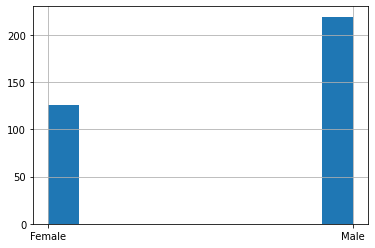

In [11]:
# Distribution of Male and Gender Speakers
df.Gender.hist()

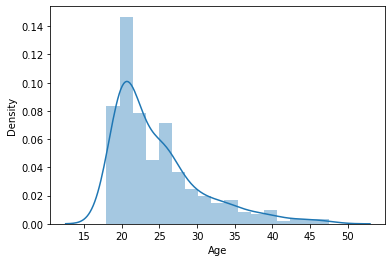

In [12]:
# Distribution of Age across the speakers
sns.distplot(df['Age'], kde=True)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d843f62d0>,
      dtype=object)

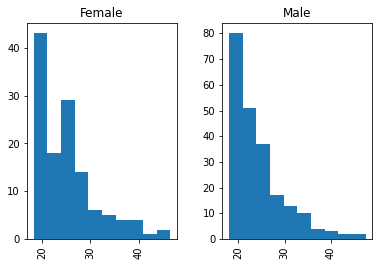

In [22]:
df['Age'].hist(by=df['Gender'])

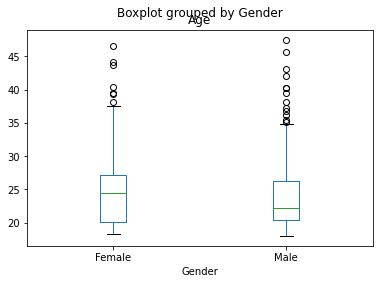

In [34]:
#Distribution of Age between Male and Female speakers
df.boxplot(column = ['Age'], by = 'Gender', grid = False)

In [36]:
# Distribution of Age group across male and female
df.groupby('Gender')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,126.0,25.147937,6.079968,18.32,20.140,24.50,27.1175,46.50
Male,219.0,24.373242,5.625443,17.98,20.425,22.21,26.2850,47.53


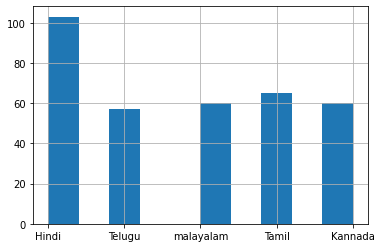

In [47]:
# Distribution of Speakers based on Mother Tongue
df.Mother_Tongue.hist()


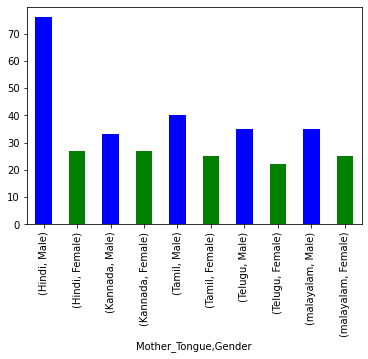

In [69]:
# Distribution of Male and female based on their Mother Tongue
p= df.groupby('Mother_Tongue')['Gender'].value_counts()
p.plot.bar(color=['blue','green'])


In [26]:
! ls "..//NISP-Dataset"

test_spkrID	      total_spkrinfo.list	train_spkrID	     val_spkrID
Total_final_data_16k  total_spkrinfo.list_trim	trim_final_data_16k


In [58]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

def plot_mel_fbank(fbank, title=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Filter bank')
  axs.imshow(fbank, aspect='auto')
  axs.set_ylabel('frequency bin')
  axs.set_xlabel('mel bin')
  plt.show(block=False)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)
def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)
def get_speech_sample(*, resample=None):
  return _get_sample(SAMPLE_WAV_SPEECH_PATH, resample=resample)
def _get_sample(path, resample=None):
  effects = [
    ["remix", "1"]
  ]
  if resample:
    effects.extend([
      ["lowpass", f"{resample // 2}"],
      ["rate", f'{resample}'],
    ])
  return torchaudio.sox_effects.apply_effects_file(path, effects=effects)

def get_noise_sample(*, resample=None):
  return _get_sample(SAMPLE_NOISE_PATH, resample=resample)
SAMPLE_NOISE_PATH = "..//noise_dataset//STRAFFIC_ch01.wav"

In [45]:
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

AudioMetaData(sample_rate=16000, num_frames=60501, num_channels=1, bits_per_sample=16, encoding=PCM_S)


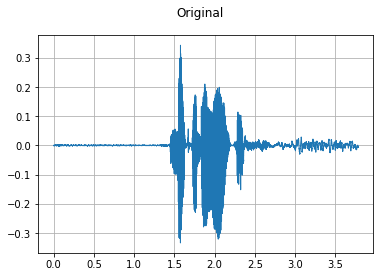

In [46]:
import torch, torchaudio
torch.random.manual_seed(0)
SAMPLE_WAV_SPEECH_PATH = "..//NISP-Dataset//trim_final_data_16k//TRAIN//Hin_0009_Eng_m_5081.wav"

metadata = torchaudio.info(SAMPLE_WAV_SPEECH_PATH)
print(metadata)



waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)
plot_waveform(waveform, sample_rate, title="Original")


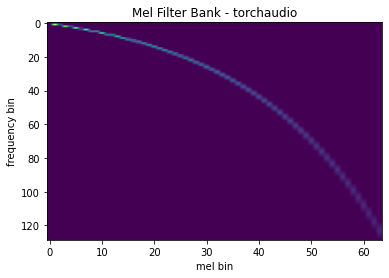

In [50]:

import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
n_fft = 256
n_mels = 64
sample_rate = 16000

mel_filters = F.melscale_fbanks(
    int(n_fft // 2 + 1),
    n_mels=n_mels,
    f_min=0.0,
    f_max=sample_rate / 2.0,
    sample_rate=sample_rate,
    norm="slaney",
)
plot_fbank(mel_filters, "Mel Filter Bank - torchaudio")

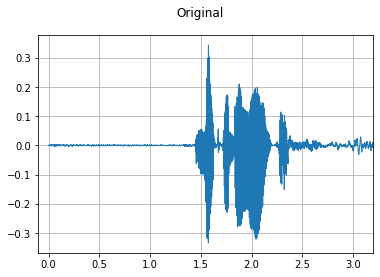

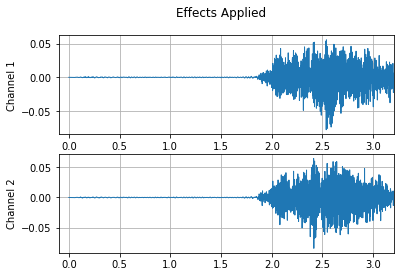

----------
Source: Original
----------
Sample Rate: 16000
Shape: (1, 60501)
Dtype: torch.float32
 - Max:      0.343
 - Min:     -0.334
 - Mean:    -0.000
 - Std Dev:  0.037

tensor([[-0.0001, -0.0004, -0.0004,  ..., -0.0042, -0.0029,  0.0000]])

----------
Source: Effects Applied
----------
Sample Rate: 16000
Shape: (2, 75626)
Dtype: torch.float32
 - Max:      0.065
 - Min:     -0.084
 - Mean:    -0.000
 - Std Dev:  0.010

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0042, 0.0043, 0.0043],
        [0.0000, 0.0000, 0.0000,  ..., 0.0051, 0.0051, 0.0052]])



In [52]:
waveform1, sample_rate1 = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)


# Define effects
effects = [
  ["lowpass", "-1", "300"], # apply single-pole lowpass filter
  ["speed", "0.8"],  # reduce the speed
                     # This only changes sample rate, so it is necessary to
                     # add `rate` effect with original sample rate after this.
  ["rate", f"{sample_rate1}"],
  ["reverb", "-w"],  # Reverbration gives some dramatic feeling
]

# Apply effects
waveform2, sample_rate2 = torchaudio.sox_effects.apply_effects_tensor(
    waveform1, sample_rate1, effects)

plot_waveform(waveform1, sample_rate1, title="Original", xlim=(-.1, 3.2))
plot_waveform(waveform2, sample_rate2, title="Effects Applied", xlim=(-.1, 3.2))
print_stats(waveform1, sample_rate=sample_rate1, src="Original")
print_stats(waveform2, sample_rate=sample_rate2, src="Effects Applied")

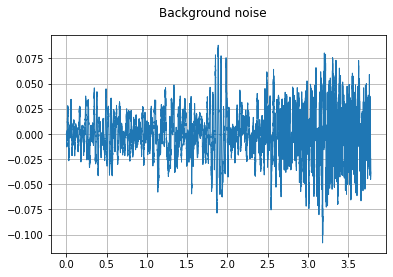

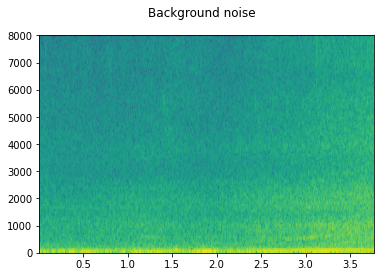

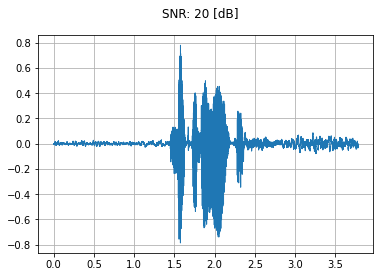

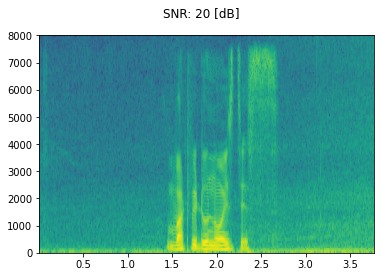

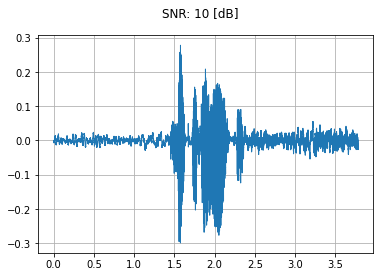

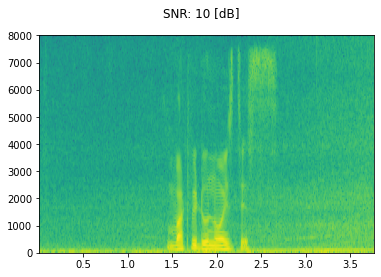

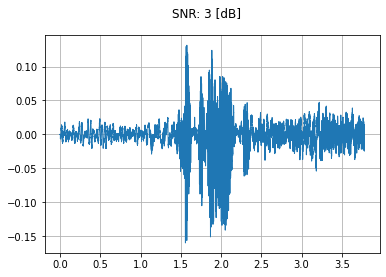

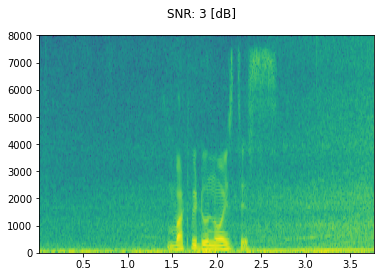

In [61]:
import math
sample_rate = 16000
speech, _ = get_speech_sample(resample=sample_rate)
noise, _ = get_noise_sample(resample=sample_rate)
noise = noise[:, :speech.shape[1]]

plot_waveform(noise, sample_rate, title="Background noise")
plot_specgram(noise, sample_rate, title="Background noise")


speech_power = speech.norm(p=2)
noise_power = noise.norm(p=2)

for snr_db in [20, 10, 3]:
  snr = math.exp(snr_db / 10)
  scale = snr * noise_power / speech_power
  noisy_speech = (scale * speech + noise) / 2

  plot_waveform(noisy_speech, sample_rate, title=f"SNR: {snr_db} [dB]")
  plot_specgram(noisy_speech, sample_rate, title=f"SNR: {snr_db} [dB]")


# Train, Validate and Test the Dataset

# Run the Model with Wav2Vec encoder + LSTM Attention layer + Multitask layer

In [ ]:
!python train_nisp.py --data_path="../NISP-Dataset/trim_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-23 19:32:06 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-23 19:32:07 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpu44zg49_
2022-08-23 19:32:07 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpu44zg49_/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 1766 862 1603
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13.2


#Run the Model with SpeechBrain Fbank + Xvector + LSTM Attention layer + Multitask layer

In [ ]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-23 20:01:48 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-23 20:01:48 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpkz6h4xf1
2022-08-23 20:01:48 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpkz6h4xf1/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: Currently logged in as: satishkumar. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.2
wandb: Run data is saved locally in /content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_AGN/wandb/run-20220823_200253-2wflnmz2
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run amber-dragon-806
wandb: ⭐️ View project at https://wandb.ai/satishkumar/SpeakerProfiling
wandb: 🚀 View run at https://wandb.ai/satishkumar/SpeakerProfiling/runs/2wflnmz2
/root/.local/lib/python3.7/site-packages/torchmetrics/utilit

#Run the Model with SpeechBrain Fbank + Xvector + LSTM Attention layer + Multitask layer (without Data Augmentation)

In [64]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-24 06:20:25 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-24 06:20:27 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpjjkek2sq
2022-08-24 06:20:27 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpjjkek2sq/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13

#Run the Model with Wav2Vec encoder + LSTM Attention layer + Multitask layer (with out Data augmentation)

In [65]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-24 09:02:53 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-24 09:02:53 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpi5tjsjdo
2022-08-24 09:02:53 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpi5tjsjdo/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: Currently logged in as: satishkumar. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.2
wandb: Run data is saved locally in /content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_AGN/wandb/run-20220824_090301-k83w93bt
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run sage-frog-808
wandb: ⭐️ View project at https://wandb.ai/satishkumar/SpeakerProfiling
wandb: 🚀 View run at https://wandb.ai/satishkumar/SpeakerProfiling/runs/k83w93bt
/root/.local/lib/python3.7/site-packages/torchmetrics/utilities